In [1]:
import pandas as pd # importing pandas


file_path = 'dataframe1.csv' #Importing 2 files to dataframes for merging data
df1 = pd.read_csv(file_path)
file_path2 = 'dataframe2.csv'
df2 = pd.read_csv(file_path2)

In [3]:
# Merging the DataFrames on 'Year', 'Region', and 'Country'
merged_df = pd.merge(df1, df2, on=['Year', 'Country', 'Region'], how='inner')

merged_df.head(100)

,Region,Country,Year,Ice Cream Value,Ice Cream Volume,Ice Cream Price,GDP,Population,Refrigerator Possession
0,Asia Pacific,Azerbaijan,2000,0.00,13334.55370,0.000000,1.748362e+10,8032800.0,89.000000
1,Asia Pacific,Azerbaijan,2001,0.00,13798.54844,0.000000,1.921490e+10,8114300.0,94.000000
2,Asia Pacific,Azerbaijan,2002,0.00,14340.58168,0.000000,2.102749e+10,8191400.0,94.800000
3,Asia Pacific,Azerbaijan,2003,0.00,15006.16547,0.000000,2.317461e+10,8269200.0,95.200000
4,Asia Pacific,Azerbaijan,2004,0.00,16047.48967,0.000000,2.531940e+10,8349100.0,95.550000
...,...,...,...,...,...,...,...,...,...
95,Asia Pacific,Indonesia,2015,39157897.92,69360.61195,564.555254,9.655427e+11,251880386.0,46.298478
96,Asia Pacific,Indonesia,2016,43783492.28,76606.77614,571.535502,1.018836e+12,254134578.0,47.964754
97,Asia Pacific,Indonesia,2017,48786730.31,84238.32004,579.151273,1.074832e+12,256328783.0,49.506429
98,Asia Pacific,Indonesia,2018,54201151.36,92402.07188,586.579394,1.133959e+12,258464031.0,50.967916


In [5]:

# Counting Ice Cream Volume per Capita
merged_df['Ice Cream Volume per Capita'] = merged_df['Ice Cream Volume'] / merged_df['Population']

# Counting GPD per Carita
merged_df['GDP per Capita'] = merged_df['GDP'] / merged_df['Population']

merged_df.head(1000)

,Region,Country,Year,Ice Cream Value,Ice Cream Volume,Ice Cream Price,GDP,Population,Refrigerator Possession,Ice Cream Volume per Capita,GDP per Capita
0,Asia Pacific,Azerbaijan,2000,0.00,13334.55370,0.000000,1.748362e+10,8032800.0,89.00,0.001660,2176.528453
1,Asia Pacific,Azerbaijan,2001,0.00,13798.54844,0.000000,1.921490e+10,8114300.0,94.00,0.001701,2368.028849
2,Asia Pacific,Azerbaijan,2002,0.00,14340.58168,0.000000,2.102749e+10,8191400.0,94.80,0.001751,2567.020385
3,Asia Pacific,Azerbaijan,2003,0.00,15006.16547,0.000000,2.317461e+10,8269200.0,95.20,0.001815,2802.521451
4,Asia Pacific,Azerbaijan,2004,0.00,16047.48967,0.000000,2.531940e+10,8349100.0,95.55,0.001922,3032.590519
...,...,...,...,...,...,...,...,...,...,...,...
995,Middle East and Africa,Algeria,2015,54673852.77,97468.23835,560.940196,1.922580e+11,37954282.0,96.10,0.002568,5065.515796
996,Middle East and Africa,Algeria,2016,62301161.53,106799.50820,583.346895,2.005290e+11,38424446.0,96.37,0.002779,5218.785843
997,Middle East and Africa,Algeria,2017,70793098.87,116821.87790,605.991790,2.090374e+11,38882895.0,96.60,0.003004,5376.075992
998,Middle East and Africa,Algeria,2018,80332151.24,127382.10920,630.639198,2.179591e+11,39328811.0,96.94,0.003239,5541.970605


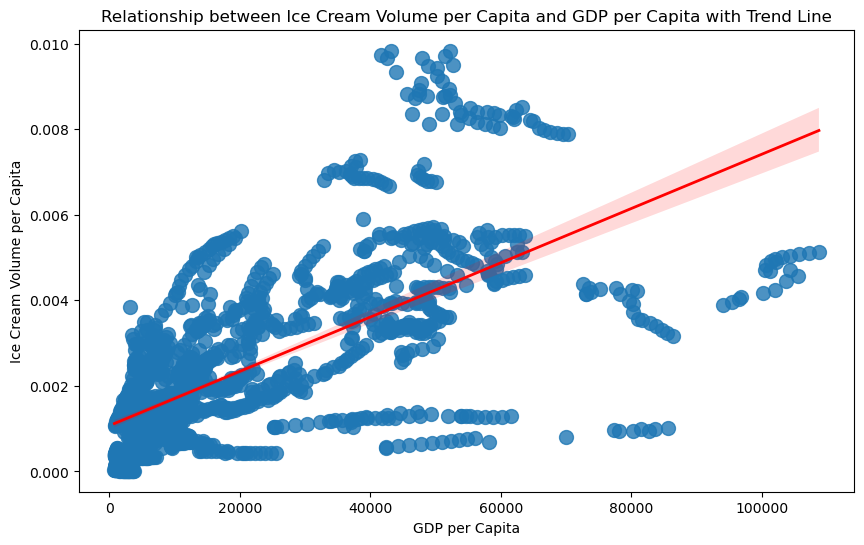

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Creating new Dataframe
data = {
    'Ice Cream Volume per Capita': merged_df['Ice Cream Volume per Capita'],
    'GDP per Capita': merged_df['GDP per Capita']
}
df = pd.DataFrame(data)
# Creating plot with trnd line
plt.figure(figsize=(10, 6))
sns.regplot(x='GDP per Capita', y='Ice Cream Volume per Capita', data=df, scatter_kws={'s':100}, line_kws={'color':'red', 'linewidth':2})

# Fixing plot
plt.title('Relationship between Ice Cream Volume per Capita and GDP per Capita with Trend Line')
plt.xlabel('GDP per Capita')
plt.ylabel('Ice Cream Volume per Capita')

# Save result to "Output"
plt.savefig('Output/ice_cream_vs_gdp_per_capita_with_trend.png')

# Show the plot
plt.show()

In [11]:
import pandas as pd
import os

def calculate_missing_data_percentage(df):
    """
    Calculate the percentage of missing data for each Country and each Indicator.

    Parameters:
    - df (DataFrame): The input DataFrame containing data for different countries and indicators.

    Returns:
    - missing_data_df (DataFrame): A DataFrame with percentages of missing data for each Country and each Indicator.
    """
    # Create a list of indicators to calculate missing data for
    indicators = ['Ice Cream Value', 'Ice Cream Volume', 'Ice Cream Price', 'GDP', 'Population', 'Refrigerator Possession', 'Ice Cream Volume per Capita', 'GDP per Capita']
    
    # Initialize an empty list to store results
    results = []

    # Calculate missing data percentage for each indicator
    for indicator in indicators:
        if indicator in df.columns:
            # Calculate the total number of entries and missing entries for the indicator
            total_entries = df.groupby('Country')[indicator].count().reset_index(name='Total Entries')
            missing_entries = df.groupby('Country')[indicator].apply(lambda x: x.isna().sum()).reset_index(name='Missing Entries')
            
            # Merge the total entries and missing entries data
            indicator_df = pd.merge(total_entries, missing_entries, on='Country')
            
            # Calculate the percentage of missing data
            indicator_df['Missing Percentage'] = (indicator_df['Missing Entries'] / (indicator_df['Total Entries'] + indicator_df['Missing Entries'])) * 100

            # Drop the intermediate columns for a cleaner table
            indicator_df = indicator_df.drop(columns=['Total Entries', 'Missing Entries'])
            indicator_df['Indicator'] = indicator
            
            results.append(indicator_df)
    
    # Combine all indicator dataframes
    missing_data_df = pd.concat(results, ignore_index=True)

    return missing_data_df


In [10]:
merged_df.columns

Index(['Region', 'Country', 'Year', 'Ice Cream Value', 'Ice Cream Volume',
       'Ice Cream Price', 'GDP', 'Population', 'Refrigerator Possession',
       'Ice Cream Volume per Capita', 'GDP per Capita'],
      dtype='object')

In [13]:
import os
# Calculate the missing data percentages
missing_data_df = calculate_missing_data_percentage(merged_df)

# Create "Output" folder if it doesn't exist
if not os.path.exists('Output'):
    os.makedirs('Output')

# Write the missing data percentages to a CSV file
missing_data_df.to_csv('Output/missing_data_percentages.csv', index=False)

print("Missing data percentages have been written to 'Output/missing_data_percentages.txt'")

Missing data percentages have been written to 'Output/missing_data_percentages.txt'
